### AIT 736 - Homework 1


### KNN

In [42]:
# libraries used 
# with the help of class material,search engines and online resources,wikipedia i was able to write this code
# This ref may help: http://glemaitre.github.io/imbalanced-learn/auto_examples/under-sampling/plot_condensed_nearest_neighbour.html

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [43]:
#changing and setting up the directory for accessing the .csv file
# I have converted the .data file to .csv along with adding the column names (from web search engine)
os.chdir('D:\Fall 2021\Applied ML - AIT 736\HW 1')
os.getcwd()

'D:\\Fall 2021\\Applied ML - AIT 736\\HW 1'

In [3]:
#reading the file
input_file ='letter-recognition.csv'
df = pd.read_csv(input_file)
df.head()
df.columns
# just for checking purpose
for a in df.columns:
    print(min(df[a]), max(df[a]))
df.columns
#as the column names were not mentioned, I have searched through the web and found the column names and incorporated names in the .csv file 

A Z
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15


Index(['Letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [44]:
df.head() # to display the first five rows of the dataframe

Letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10

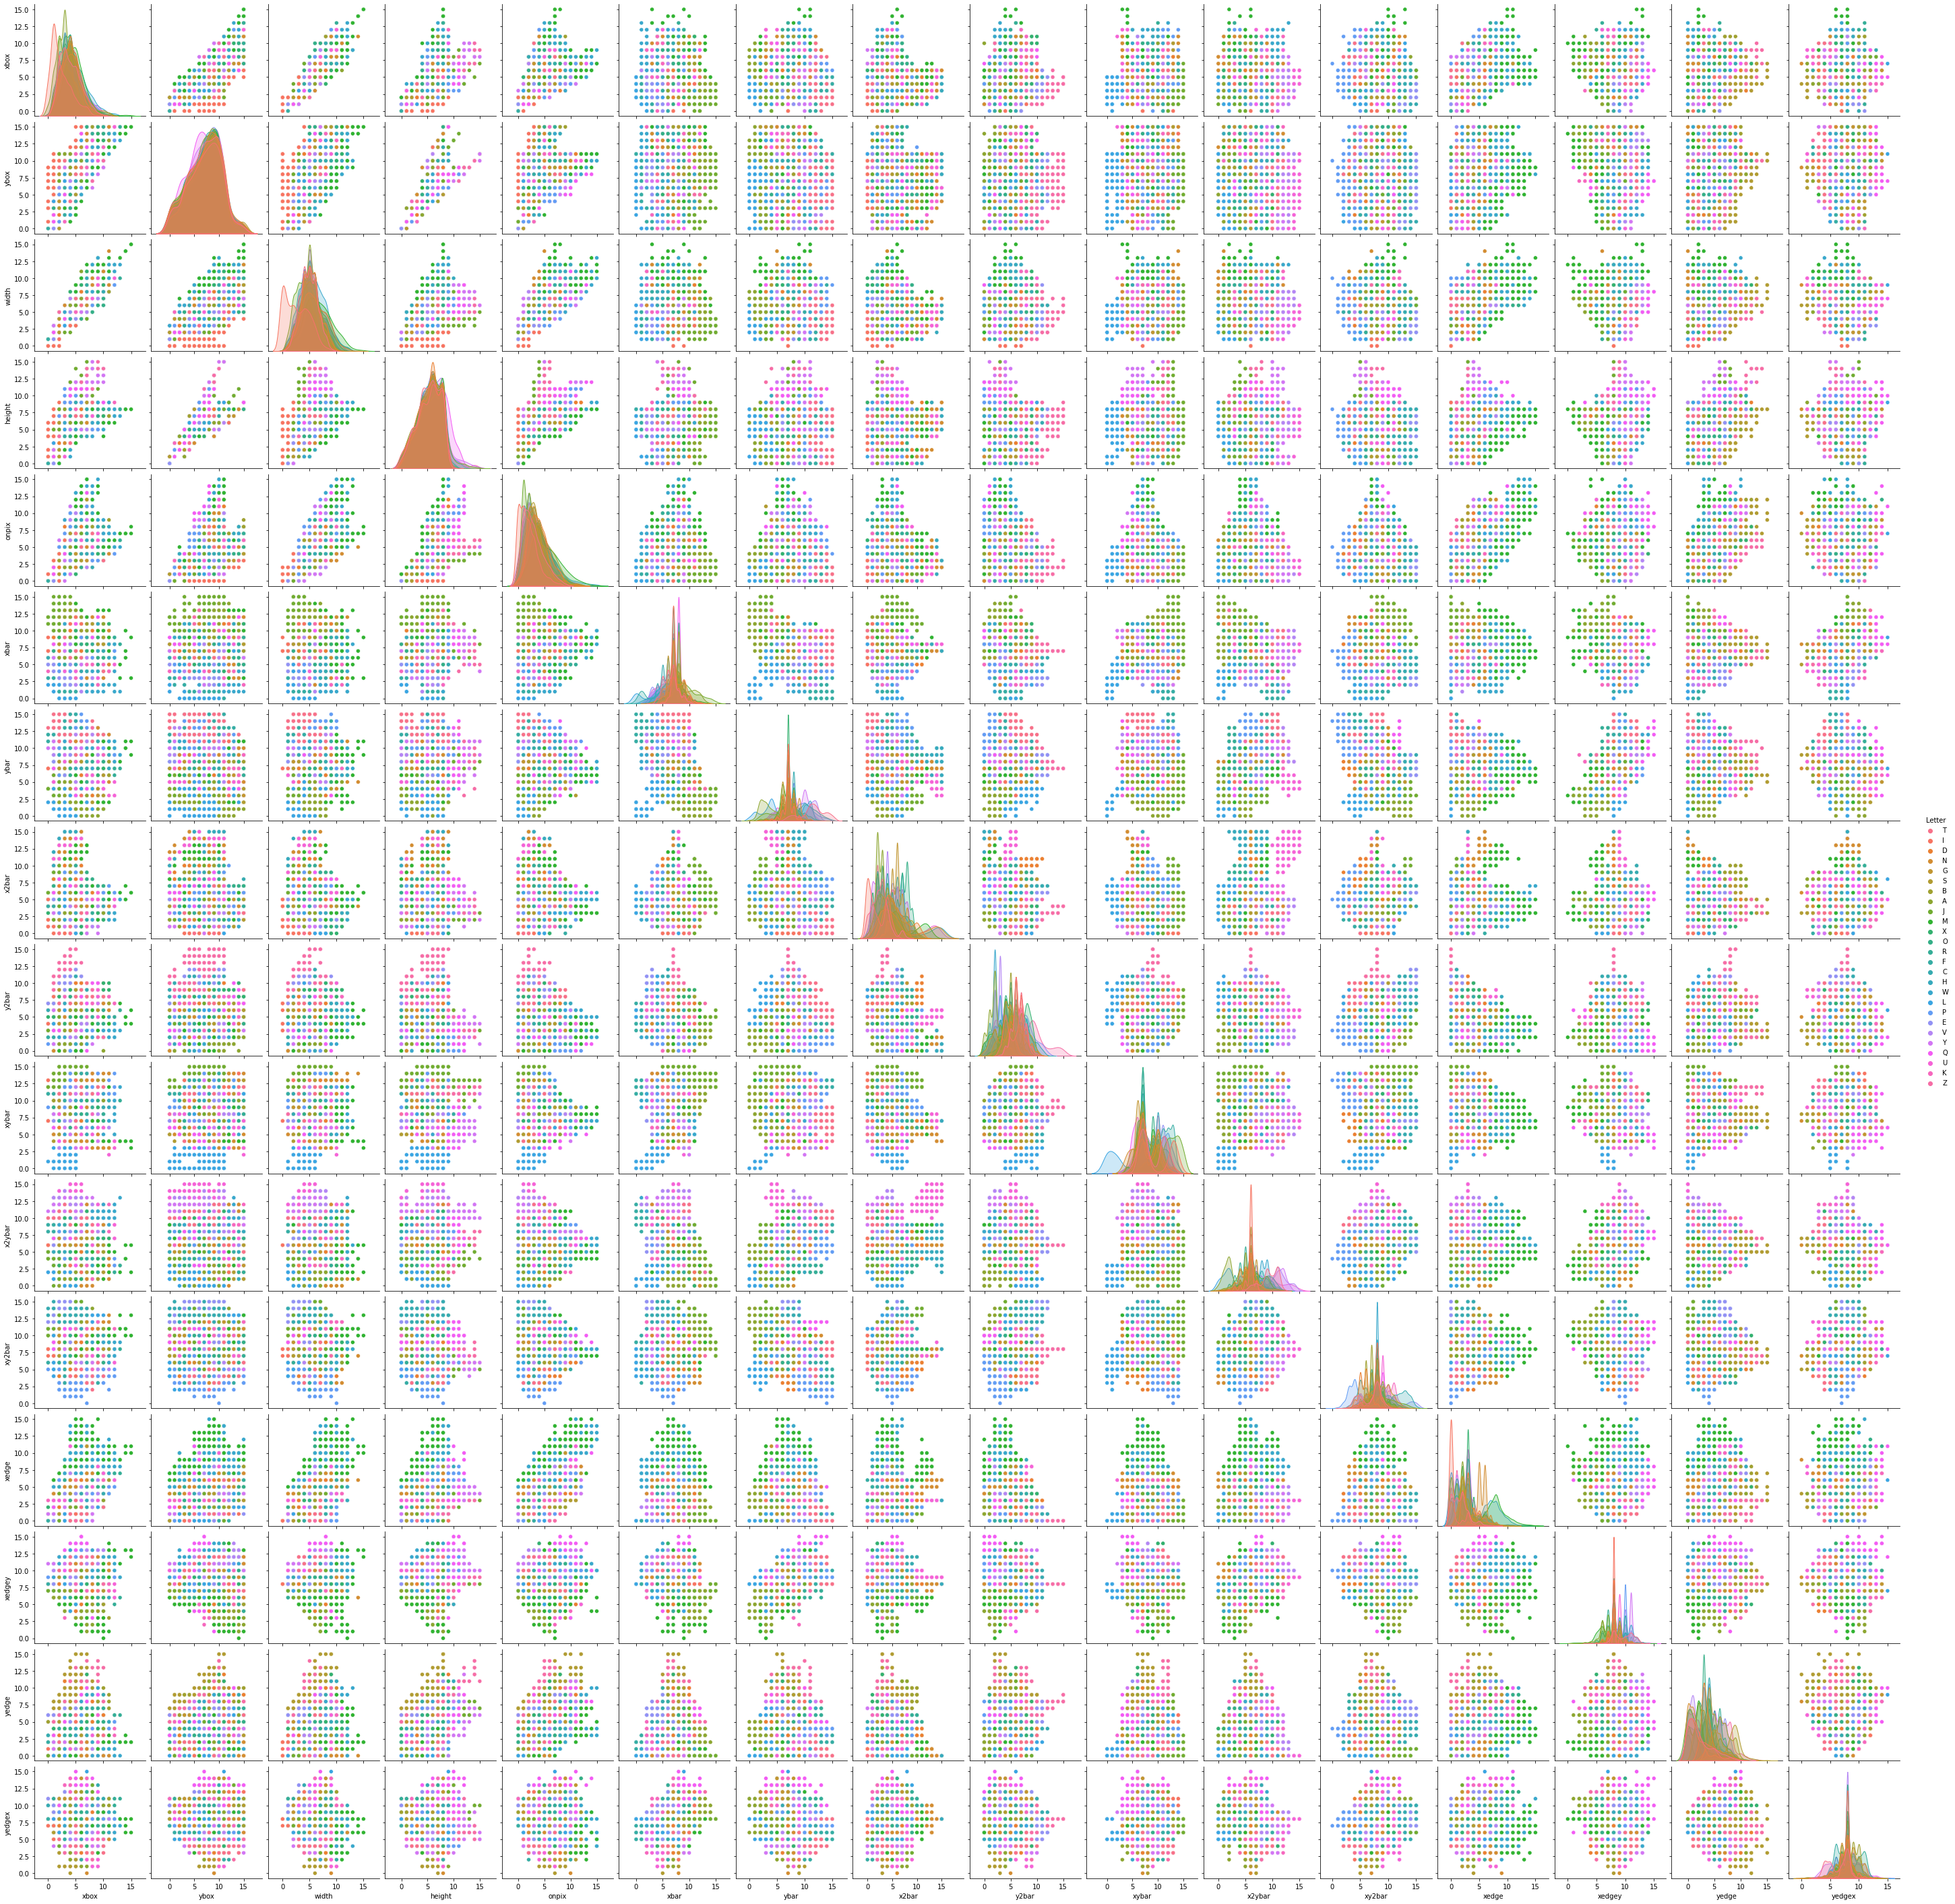

In [41]:

sns.pairplot(df,hue='Letter') 
#pairplot is used to see how all the variables in the data frame are related to each other.
#As this is huge data set, this image being small is not able to give a clear information.But the image can be downloaded and can be zoomed

C:\Users\chakri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Letter', ylabel='count'>

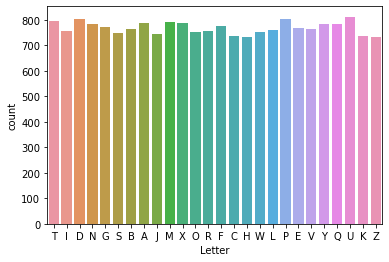

In [42]:
sns.countplot(df['Letter'])# to display the letter count

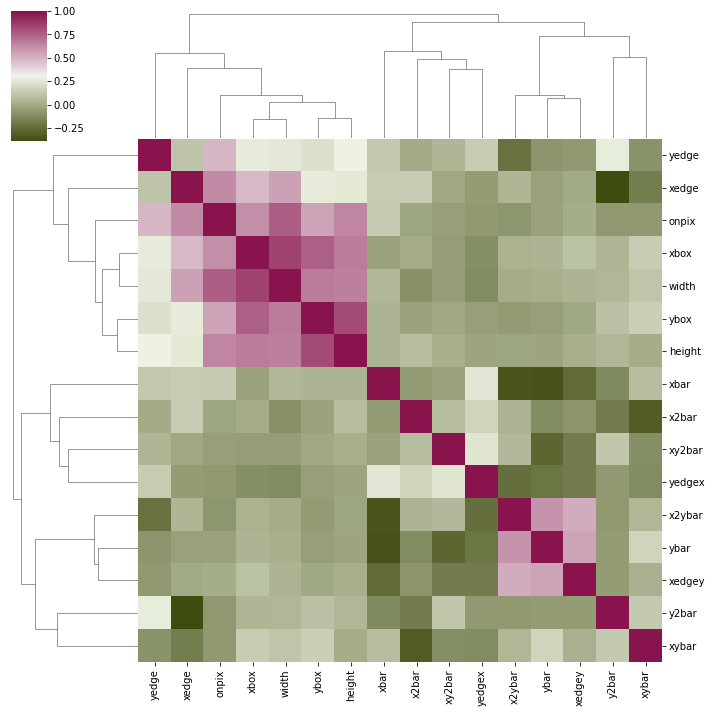

In [43]:
cmap = sns.diverging_palette(h_neg=100, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.clustermap(df.corr(), figsize=(10, 10), cmap=cmap)
#clustergrid to see if the variables are highly correlated. We observe there is is high correlation between onpix and width, xbox and width and there are a few of these

In [5]:
df.corr() # to find the pairwise correlation of all columns in this dataframe

xbox      ybox     width    height     onpix      xbar      ybar  \
xbox    1.000000  0.757793  0.851514  0.672764  0.619097 -0.032595  0.045545   
ybox    0.757793  1.000000  0.671912  0.823207  0.555067  0.045690 -0.040925   
width   0.851514  0.671912  1.000000  0.660215  0.765716  0.061959  0.024832   
height  0.672764  0.823207  0.660215  1.000000  0.644366  0.042844 -0.020072   
onpix   0.619097  0.555067  0.765716  0.644366  1.000000  0.139159 -0.028822   
xbar   -0.032595  0.045690  0.061959  0.042844  0.139159  1.000000 -0.356580   
ybar    0.045545 -0.040925  0.024832 -0.020072 -0.028822 -0.356580  1.000000   
x2bar   0.014306 -0.025019 -0.098611  0.082383 -0.011985 -0.053306 -0.118625   
y2bar   0.052086  0.096478  0.057074  0.059032 -0.065557 -0.122851 -0.049658   
xybar   0.148056  0.159954  0.115018  0.012458 -0.069776  0.085963  0.178318   
x2ybar  0.035464 -0.054648  0.011694 -0.011991 -0.072941 -0.341957  0.600397   
xy2bar -0.046333 -0.007568 -0.045009  0.026386 -0.038858 -0.032115 -0.271649   
xedge   0.489155  0.274431  0.557251  0.265243  0.627507  0.144325 -0.036722   
xedgey  0.098180 -0.001336  0.045658  0.025359  0.017649 -0.253339  0.555060   
yedge   0.273504  0.230883  0.260285  0.297545  0.492653  0.127056 -0.078008   
yedgex -0.105147 -0.042741 -0.118273 -0.018853 -0.062969  0.248816 -0.207900   

           x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
xbox    0.014306  0.052086  0.148056  0.035464 -0.046333  0.489155  0.098180   
ybox   -0.025019  0.096478  0.159954 -0.054648 -0.007568  0.274431 -0.001336   
width  -0.098611  0.057074  0.115018  0.011694 -0.045009  0.557251  0.045658   
height  0.082383  0.059032  0.012458 -0.011991  0.026386  0.265243  0.025359   
onpix  -0.011985 -0.065557 -0.069776 -0.072941 -0.038858  0.627507  0.017649   
xbar   -0.053306 -0.122851  0.085963 -0.341957 -0.032115  0.144325 -0.253339   
ybar   -0.118625 -0.049658  0.178318  0.600397 -0.271649 -0.036722  0.555060   
x2bar   1.000000 -0.188431 -0.317780  0.042545  0.082020  0.142132 -0.084820   
y2bar  -0.188431  1.000000  0.132000 -0.060116  0.119048 -0.384018 -0.052545   
xybar  -0.317780  0.132000  1.000000  0.057988 -0.106759 -0.175676  0.029419   
x2ybar  0.042545 -0.060116  0.057988  1.000000  0.063214  0.053566  0.527239   
xy2bar  0.082020  0.119048 -0.106759  0.063214  1.000000 -0.008753 -0.184927   
xedge   0.142132 -0.384018 -0.175676  0.053566 -0.008753  1.000000  0.002849   
xedgey -0.084820 -0.052545  0.029419  0.527239 -0.184927  0.002849  1.000000   
yedge   0.006546  0.277540 -0.087019 -0.226251  0.049695  0.108411 -0.064402   
yedgex  0.182902 -0.061335 -0.114223 -0.236518  0.245808 -0.049789 -0.187591   

           yedge    yedgex  
xbox    0.273504 -0.105147  
ybox    0.230883 -0.042741  
width   0.260285 -0.118273  
height  0.297545 -0.018853  
onpix   0.492653 -0.062969  
xbar    0.127056  0.248816  
ybar   -0.078008 -0.207900  
x2bar   0.006546  0.182902  
y2bar   0.277540 -0.061335  
xybar  -0.087019 -0.114223  
x2ybar -0.226251 -0.236518  
xy2bar  0.049695  0.245808  
xedge   0.108411 -0.049789  
xedgey -0.064402 -0.187591  
yedge   1.000000  0.143588  
yedgex  0.143588  1.000000

In [46]:
# just a display of x and y
x=df.iloc[:,1:]
y=df.iloc[:,0]
print(y)
required_array_x = np.array(df.iloc[:,1:])
print(required_array_x)
required_array_y = np.array(df.iloc[:,0])
print(required_array_y)

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: Letter, Length: 20000, dtype: object
[[ 2  8  3 ...  8  0  8]
 [ 5 12  3 ...  8  4 10]
 [ 4 11  6 ...  7  3  9]
 ...
 [ 6  9  6 ... 12  2  4]
 [ 2  3  4 ...  9  5  8]
 [ 4  9  6 ...  7  2  8]]
['T' 'I' 'D' ... 'T' 'S' 'A']


In [50]:
##splitting the data into train and test with test samples of 5000 (random selection)
X_train, X_test, y_train, y_test = train_test_split(x,df['Letter'],test_size=0.25,random_state=1)

In [51]:
#Fitting the KNN Classifier with k=1
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
#predicting the values for the unseen test data
pred = knn.predict(X_test)
print(pred)

['D' 'D' 'V' ... 'D' 'T' 'R']


In [56]:
#importing cross_val_score,classification_report,confusion_matrix from scikit learn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [57]:
#confusion matrix between the actual test values and the predicted test values 
print(confusion_matrix(y_test,pred))

[[198   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   3   0]
 [  0 193   0   0   0   0   1   0   0   0   0   0   1   1   0   0   0   2
    1   0   0   1   0   0   0   0]
 [  0   0 177   0   1   0   2   0   0   0   0   1   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 189   0   0   0   2   0   0   0   0   0   0   3   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 166   0   2   1   0   0   1   1   0   0   0   1   0   0
    1   0   0   0   0   3   0   1]
 [  0   0   0   0   0 169   0   0   0   0   0   0   0   0   0   4   0   1
    0   1   0   1   0   0   1   0]
 [  0   1   1   0   2   0 176   0   1   0   1   0   1   0   2   0   1   0
    1   0   0   1   0   0   0   0]
 [  0   2   0   5   1   0   1 162   0   0   5   0   0   0   1   1   0   3
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 168   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [58]:
#classification_report gives precision,recall,f1-score,support
print(classification_report(y_test,pred))
#when the model predicts the letter is B, it is correct 93% of the time. - precision
#it correctly identifies 94% of all 'B' letters - Recall

              precision    recall  f1-score   support

           A       0.99      0.98      0.99       202
           B       0.90      0.96      0.93       200
           C       0.97      0.97      0.97       182
           D       0.91      0.96      0.93       197
           E       0.93      0.93      0.93       178
           F       0.91      0.95      0.93       177
           G       0.96      0.94      0.95       188
           H       0.91      0.90      0.90       181
           I       0.95      0.99      0.97       170
           J       0.96      0.95      0.96       174
           K       0.89      0.91      0.90       164
           L       0.97      0.98      0.97       174
           M       0.98      0.98      0.98       188
           N       0.98      0.94      0.96       200
           O       0.96      0.95      0.96       218
           P       0.97      0.92      0.94       215
           Q       0.96      0.97      0.97       190
           R       0.91    

In [59]:
print('\n KNN_Classifier Model Acuuracy Score with k=1 : ',accuracy_score(y_test,pred)) 


 KNN_Classifier Model Acuuracy Score with k=1 :  0.9538


In [61]:
accuracy_rate = []

# Will take some time as knn compares the test data with training data
#finding accuracy score
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,df['Letter'],cv=10)
    accuracy_rate.append(score.mean())

In [64]:
error_rate = []
# Will take some time as knn compares the test data with training data
#finding error rate
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,df['Letter'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Score')

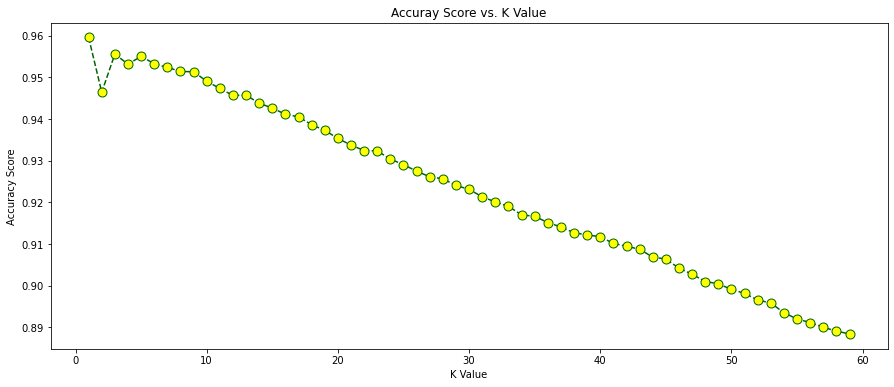

In [65]:
plt.figure(figsize=(15,6))
plt.plot(range(1,60),accuracy_rate,color='darkgreen', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=9)
plt.title('Accuray Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

Text(0, 0.5, 'Error Rate')

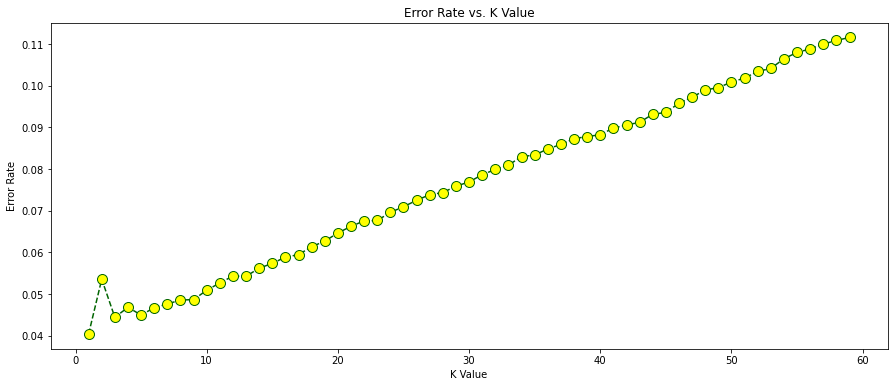

In [66]:
plt.figure(figsize=(15,6))
plt.plot(range(1,60),error_rate,color='darkgreen', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [ ]:
# I consider k =5 because when k=1 the model is complicated and the data is overfitted and 
#after k=5 there is a constant thing (increase) and no variation in the graph line

#Nearest neighbour is sensitive when it is dealing with more irrelevant features. one way to overcome this
#problem is to use the cross validation approach
#stretching the axis in order to optimize the performance of knn provides a way to reduce the impact of irrelevant attributes

In [29]:
# K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred1 = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred1))
print('\n')
print(classification_report(y_test,pred1))
print('\n KNN_Classifier Model Acuuracy Score with k=5 : ',accuracy_score(y_test,pred1)) 

WITH K=5


[[193   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 172   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   6
    0   0   0   1   0   1   0   0]
 [  0   0 185   0   0   0   1   0   0   0   1   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0 175   0   0   0   4   0   0   0   0   0   1   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   2   0 192   0   3   0   0   0   0   0   0   0   0   0   2   0
    1   0   0   0   0   1   0   1]
 [  0   0   0   1   0 192   0   0   0   1   0   0   0   2   0   7   1   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   3   1   0 171   1   0   0   0   0   0   0   2   0   0   1
    0   0   0   0   1   0   0   0]
 [  0   2   0   5   0   1   3 168   0   0   9   0   1   0   0   0   0   3
    0   1   0   0   0   0   0   0]
 [  0   0   1   1   0   2   0   0 189   3   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   

### CNN

In [ ]:
#Condensed KNN is the solution (better compared to knn for this dataset as it takes more classification time) 
#as in this model we just deal with few training data and not the entire dataset (training data is reduced).
#Condensed KNN generally takes the data, condenses(subsets) it and then KNN is applied
#Condensed KNN condenses the data based on the value of K 
#this reduces the memory issue and the computational and search time
#lets say k=3. so now we select subset with atleast 3 datapoints. 
#so much data will be thrown away in through this algorithmn but it will still have the approximate boundary as KNN
# we should make sure that the subset class must match the dataset class or else we repeat the process until there is training consistantcy
# this algorithmn is well defined
#run this for atmost N steps
#upon termination the subset must be training consistant.

In [74]:
from collections import Counter
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=6)
X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
print(len(X_resampled))
print(len(y_resampled))

[('A', 22), ('B', 42), ('C', 43), ('D', 82), ('E', 26), ('F', 24), ('G', 77), ('H', 77), ('I', 17), ('J', 27), ('K', 37), ('L', 24), ('M', 32), ('N', 46), ('O', 535), ('P', 38), ('Q', 97), ('R', 47), ('S', 29), ('T', 21), ('U', 44), ('V', 26), ('W', 35), ('X', 27), ('Y', 21), ('Z', 19)]
1515
1515


In [75]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_resampled, y_resampled)
Y_prediction = knn2.predict(X_test)
print(sorted(Counter(Y_prediction).items()))
len(Y_prediction)

[('A', 185), ('B', 223), ('C', 172), ('D', 201), ('E', 181), ('F', 201), ('G', 207), ('H', 231), ('I', 157), ('J', 174), ('K', 182), ('L', 193), ('M', 178), ('N', 193), ('O', 242), ('P', 209), ('Q', 202), ('R', 165), ('S', 212), ('T', 193), ('U', 206), ('V', 181), ('W', 193), ('X', 153), ('Y', 207), ('Z', 159)]


5000

In [76]:
from sklearn.metrics import accuracy_score
print('\n CNN_Classifier Model Acuuracy Score when k = 1 : ',accuracy_score(y_test,Y_prediction))    


 CNN_Classifier Model Acuuracy Score when k = 1 :  0.78


In [77]:
print(classification_report(y_test,Y_prediction))
#when the model predicts the letter is B, it is correct 74% of the time. - precision
#it correctly identifies 83% of all 'B' letters - Recall

              precision    recall  f1-score   support

           A       0.95      0.87      0.90       202
           B       0.74      0.83      0.78       200
           C       0.84      0.80      0.82       182
           D       0.79      0.80      0.79       197
           E       0.65      0.66      0.65       178
           F       0.62      0.70      0.66       177
           G       0.78      0.86      0.82       188
           H       0.57      0.73      0.64       181
           I       0.87      0.81      0.84       170
           J       0.84      0.84      0.84       174
           K       0.63      0.70      0.66       164
           L       0.86      0.95      0.90       174
           M       0.89      0.85      0.87       188
           N       0.83      0.80      0.81       200
           O       0.87      0.97      0.92       218
           P       0.78      0.76      0.77       215
           Q       0.85      0.91      0.88       190
           R       0.80    